In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [5]:

load = ctrl.Antecedent(np.arange(0, 11, 1), 'load')
dirt_level = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt_level')
fabric_type = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric_type')


wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')
water_level = ctrl.Consequent(np.arange(0, 11, 1), 'water_level')


load['small'] = fuzz.trimf(load.universe, [0, 0, 5])
load['medium'] = fuzz.trimf(load.universe, [0, 5, 10])
load['large'] = fuzz.trimf(load.universe, [5, 10, 10])

dirt_level['low'] = fuzz.trimf(dirt_level.universe, [0, 0, 5])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [0, 5, 10])
dirt_level['high'] = fuzz.trimf(dirt_level.universe, [5, 10, 10])


fabric_type['delicate'] = fuzz.trimf(fabric_type.universe, [0, 0, 5])
fabric_type['normal'] = fuzz.trimf(fabric_type.universe, [0, 5, 10])
fabric_type['heavy'] = fuzz.trimf(fabric_type.universe, [5, 10, 10])


wash_time['short'] = fuzz.trimf(wash_time.universe, [0, 0, 30])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [0, 30, 60])
wash_time['long'] = fuzz.trimf(wash_time.universe, [30, 60, 60])
wash_time['very_short'] = fuzz.trimf(wash_time.universe, [0, 0, 15])
wash_time['very_long'] = fuzz.trimf(wash_time.universe, [45, 60, 60])


water_level['low'] = fuzz.trimf(water_level.universe, [0, 0, 5])
water_level['medium'] = fuzz.trimf(water_level.universe, [0, 5, 10])
water_level['high'] = fuzz.trimf(water_level.universe, [5, 10, 10])
water_level['very_high'] = fuzz.trimf(water_level.universe, [8, 10, 10])



In [6]:
rule1 = ctrl.Rule(load['small'] & dirt_level['low'], (wash_time['short'], water_level['low']))
rule2 = ctrl.Rule(load['small'] & dirt_level['medium'], (wash_time['medium'], water_level['medium']))
rule3 = ctrl.Rule(load['small'] & dirt_level['high'], (wash_time['long'], water_level['medium']))
rule4 = ctrl.Rule(load['medium'] & dirt_level['low'], (wash_time['medium'], water_level['medium']))
rule5 = ctrl.Rule(load['medium'] & dirt_level['medium'], (wash_time['long'], water_level['medium']))
rule6 = ctrl.Rule(load['medium'] & dirt_level['high'], (wash_time['long'], water_level['high']))
rule7 = ctrl.Rule(load['large'] & dirt_level['low'], (wash_time['medium'], water_level['high']))
rule8 = ctrl.Rule(load['large'] & dirt_level['medium'], (wash_time['long'], water_level['high']))
rule9 = ctrl.Rule(load['large'] & dirt_level['high'], (wash_time['long'], water_level['high']))

rule10 = ctrl.Rule(fabric_type['delicate'], (wash_time['short'], water_level['low']))
rule11 = ctrl.Rule(fabric_type['normal'], None)
rule12 = ctrl.Rule(fabric_type['heavy'], (wash_time['long'], water_level['high']))
rule13 = ctrl.Rule(load['large'] & dirt_level['high'] & fabric_type['heavy'],
                  (wash_time['very_long'], water_level['very_high']))
rule14 = ctrl.Rule(load['small'] & dirt_level['low'] & fabric_type['delicate'],
                  (wash_time['very_short'], water_level['low']))
rule15 = ctrl.Rule(load['medium'] & dirt_level['medium'] & fabric_type['normal'],
                  (wash_time['medium'], water_level['medium']))

washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
                                 rule10, rule12, rule13, rule14, rule15])
washing = ctrl.ControlSystemSimulation(washing_ctrl)

Thời gian giặt: 40.35294117647058 phút
Mức nước: 6.106060606060607/10


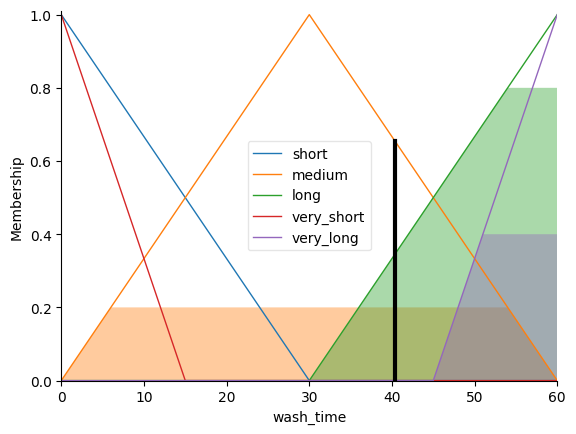

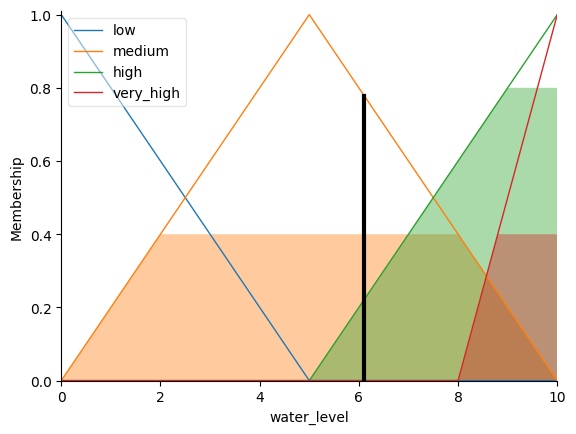

In [7]:
washing.input['load'] = 8
washing.input['dirt_level'] = 7
washing.input['fabric_type'] = 9

washing.compute()


print(f"Thời gian giặt: {washing.output['wash_time']} phút")
print(f"Mức nước: {washing.output['water_level']}/10")


wash_time.view(sim=washing)
water_level.view(sim=washing)
plt.show()